# **LOADING AND PREPROCESSING THE DATA :**

In [2]:
import pandas as pd

data = pd.read_csv("data.csv")

data = data.dropna()

# Encode categorical variables if any
data = pd.get_dummies(data, columns=['Country'])


In [3]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['UnitPrice', 'Quantity']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# **FEATURE SELECTION :**

In [4]:
features = ['UnitPrice', 'Quantity']
X = data[features]

# **APPLYING CLUSTERING ALGORITHM (KMEANS)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

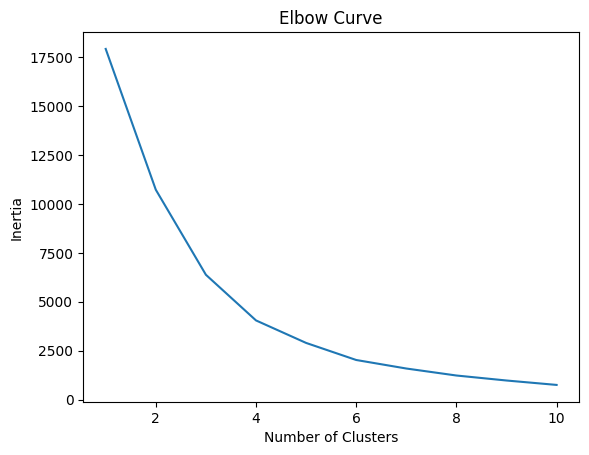

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [5]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to identify the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Choose the optimal number of clusters and perform clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

In [6]:
# Choose the optimal number of clusters and perform clustering
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

# **ANALYZING THE RESULTS :**

In [8]:
# Assign cluster labels to each customer
data['Cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_means = data.groupby('Cluster').mean()
cluster_sizes = data['Cluster'].value_counts()

# Print cluster characteristics
for i in range(k):
    print(f"Cluster {i+1}: Size={cluster_sizes[i]}, {cluster_means.iloc[i]}")

Cluster 1: Size=951, Quantity                     -0.055272
UnitPrice                     1.468392
CustomerID                15520.315457
Country_Australia             0.005258
Country_Belgium               0.002103
Country_EIRE                  0.031546
Country_France                0.018927
Country_Germany               0.033649
Country_Italy                 0.002103
Country_Japan                 0.000000
Country_Lithuania             0.000000
Country_Netherlands           0.001052
Country_Norway                0.002103
Country_Poland                0.001052
Country_Portugal              0.002103
Country_Spain                 0.000000
Country_Switzerland           0.002103
Country_United Kingdom        0.898002
Name: 0, dtype: float64
Cluster 2: Size=8002, Quantity                      0.017183
UnitPrice                    -0.186078
CustomerID                15607.890277
Country_Australia             0.001125
Country_Belgium               0.001250
Country_EIRE                  0.0128

<ipython-input-8-6906292c298e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('Cluster').mean()


# **VISUALIZING THE CLUSTERS**

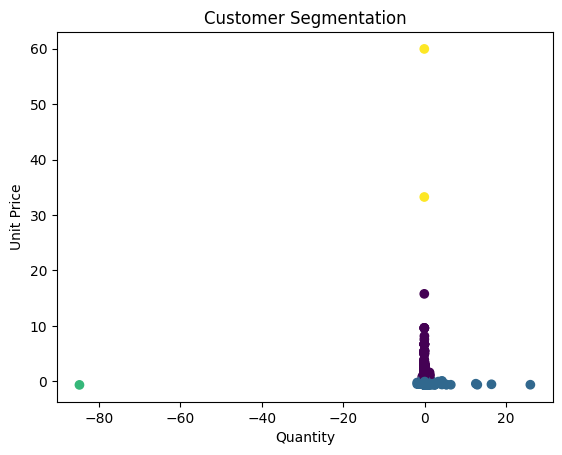

In [9]:
# Scatter plot of clusters
plt.scatter(X['Quantity'], X['UnitPrice'], c=data['Cluster'])
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Customer Segmentation')
plt.show()